# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [288]:
import pandas as pd 
from scipy.io import loadmat 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [238]:
#Load Data
data_set_1 = loadmat("./data/ejer_1_data1.mat")
print(data_set_1.keys())

# Create a dictionary with its features
data_set_dict = {'X_1': [],
                 'X_2': [],
                 'y_target': []}
# Extract info and values from file, imagine as if you're doing
# webscrapping with an api
for i,value in enumerate(data_set_1['X']):
    data_set_dict['X_1'].append(data_set_1['X'][i][0])
    data_set_dict['X_2'].append(data_set_1['X'][i][1])
for i,value in enumerate(data_set_1['y']):
    data_set_dict['y_target'].append(data_set_1['y'][i][0])

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


#### 3. Create a DataFrame with the features and target

In [239]:
df_1 = pd.DataFrame(data_set_dict)
df_1.head()

,X_1,X_2,y_target
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


#### 4. Plot a scatterplot with the data

In [240]:
df_1.info()
df_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X_1       51 non-null     float64
 1   X_2       51 non-null     float64
 2   y_target  51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


,X_1,X_2,y_target
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


<Axes: xlabel='X_1', ylabel='X_2'>

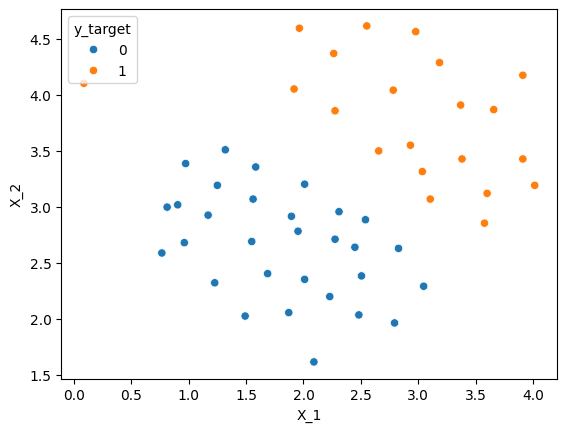

In [241]:
sns.scatterplot(data=df_1, x= 'X_1', y='X_2', hue= 'y_target')

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [242]:
X = df_1[['X_1', 'X_2']]
y = df_1['y_target']

In [243]:
l_svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42)
l_svc_1.fit(X,y)

LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=42)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [244]:
# Score first SVC
print('Score', l_svc_1.score(X, y))

Score 0.9803921568627451


It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [245]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [246]:
score = 0
c = 1
while score < 1:   
    l_svc_2 = LinearSVC(C=c, loss='hinge', max_iter=10000, random_state=42)
    #print(f"probando linearSVC con C {c}")
    l_svc_2.fit(X,y)
    score = l_svc_2.score(X, y)
    #print('Score', score)
    if score == 1:
        print(f'best c: {c}')
        print('Score', score)
    c = c + 1
    

best c: 329
Score 1.0


This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

[ 0.80279334  0.38386169  1.37743546  0.52110578  0.33332623  0.86861907
  0.68645164  1.61113696  0.83442555  1.16708444  1.07317294  0.22973717
  0.33178214  0.7957627   0.31573801  1.27403112  1.21012243  0.99989699
  0.56467004  0.38982786 -0.4352709  -0.30885065 -0.68626384 -0.55402755
 -0.33251463 -0.29385178 -0.44071748 -0.98399932 -0.68564004 -1.32848766
 -1.00379859 -1.49231429 -0.61142491 -0.68344818 -1.00004375 -1.15275004
 -1.57842152 -1.3559886  -1.03240236 -1.18504602 -0.77141299 -0.76692797
 -0.46650211 -1.         -0.5103415  -0.85864731 -1.55903864 -0.25489812
 -1.11365191 -1.5471991  -0.70994435]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


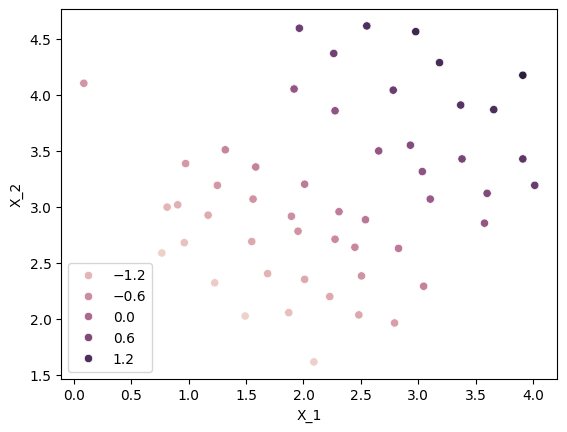

In [247]:
#Valores de decision y predicciones
print(l_svc_1.decision_function(X))
print(l_svc_1.predict(X))
# Scatter plot
sns.scatterplot(data=df_1, x='X_1', y='X_2', hue=l_svc_1.decision_function(X));

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

[ 8.26941516e+00  4.18206554e+00  1.07609405e+01  3.88056778e+00
  9.54624455e-01  4.37107899e+00  4.25644347e+00  1.06477161e+01
  6.75844444e+00  9.96826459e+00  7.43375230e+00  1.13187793e+00
  4.52983025e+00  7.56440176e+00  2.80455004e+00  9.46954851e+00
  7.92699609e+00  5.66540873e+00  2.79060170e+00  2.58623804e+00
 -1.00000000e+00 -8.91239877e-01 -3.84302345e+00 -3.46280819e+00
 -1.73205040e+00 -2.53800772e+00 -4.20874617e+00 -7.41609964e+00
 -5.03386942e+00 -8.90357727e+00 -6.55586320e+00 -8.84362788e+00
 -3.10843318e+00 -2.97297313e+00 -5.52872021e+00 -7.07254256e+00
 -1.01185957e+01 -7.15953813e+00 -4.97025068e+00 -5.44219891e+00
 -2.41944613e+00 -2.98085336e+00 -6.81475088e-01 -6.99829859e+00
 -3.48063425e+00 -7.06712900e+00 -1.12562306e+01 -1.59765516e+00
 -5.05964891e+00 -8.29457340e+00  4.61008934e-05]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


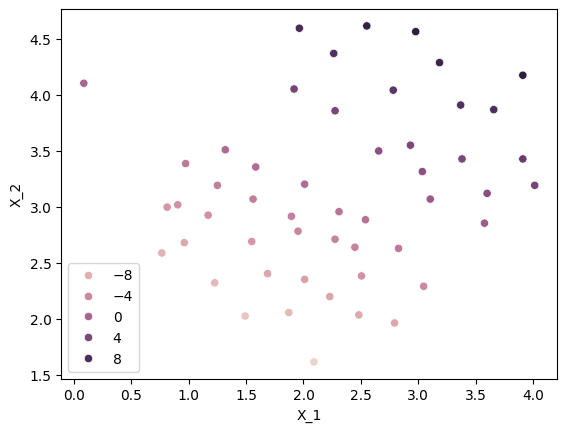

In [248]:
#Valores de decision y predicciones
print(l_svc_2.decision_function(X))
print(l_svc_2.predict(X))
# Scatter plot
sns.scatterplot(data=df_1, x='X_1', y='X_2', hue=l_svc_2.decision_function(X));

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [270]:
data_set_2 = loadmat("./data/ejer_1_data2.mat")
print(data_set_2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [271]:
# Create a dictionary with its features
data_set_dict_2 = {'X_1': [],
                 'X_2': [],
                 'y_target': []}
# Extract info and values from file, imagine as if you're doing
# webscrapping with an api
for i,value in enumerate(data_set_2['X']):
    data_set_dict_2['X_1'].append(data_set_2['X'][i][0])
    data_set_dict_2['X_2'].append(data_set_2['X'][i][1])
for i,value in enumerate(data_set_2['y']):
    data_set_dict_2['y_target'].append(data_set_2['y'][i][0])

#### 2. Create a DataFrame with the features and target

In [278]:
df_2 = pd.DataFrame(data_set_dict_2)
df_2

,X_1,X_2,y_target
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


#### 3. Plot a scatterplot with the data

<Axes: xlabel='X_1', ylabel='X_2'>

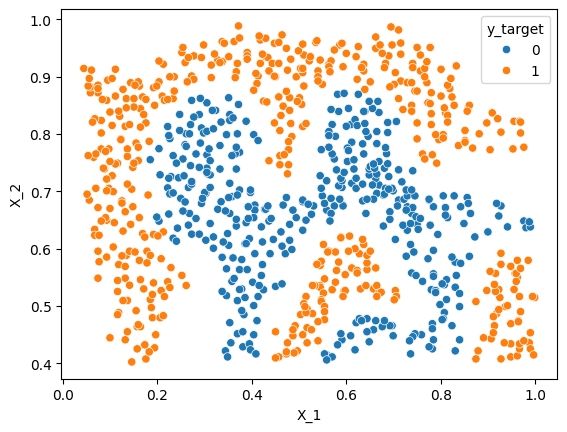

In [281]:
sns.scatterplot(data=df_2, x= 'X_1', y='X_2', hue= 'y_target')

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [283]:
X_svc = df_2[['X_1', 'X_2']]
y_svc = df_2['y_target']

In [313]:
svc_model = SVC(C=100, gamma=10, probability=True)
svc_model

SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [314]:
svc_model.fit(X_svc,y_svc)
svc_model.score(X_svc,y_svc)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [347]:
svc_propabilities = svc_model.predict_proba(X_svc)

In [353]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_svc[:, 0], X_svc[:, 1], c=svc_probabilities, cmap='Blues', s=80, edgecolors='k', marker='o')
plt.colorbar(scatter, label="Probability of Class 0")  # Add color bar to show probability scale
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot with Probability of Predicting Class 0")
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x800 with 0 Axes>

In [348]:
len(svc_propabilities)

863

ValueError: 'c' argument has 1726 elements, which is inconsistent with 'x' and 'y' with size 863.

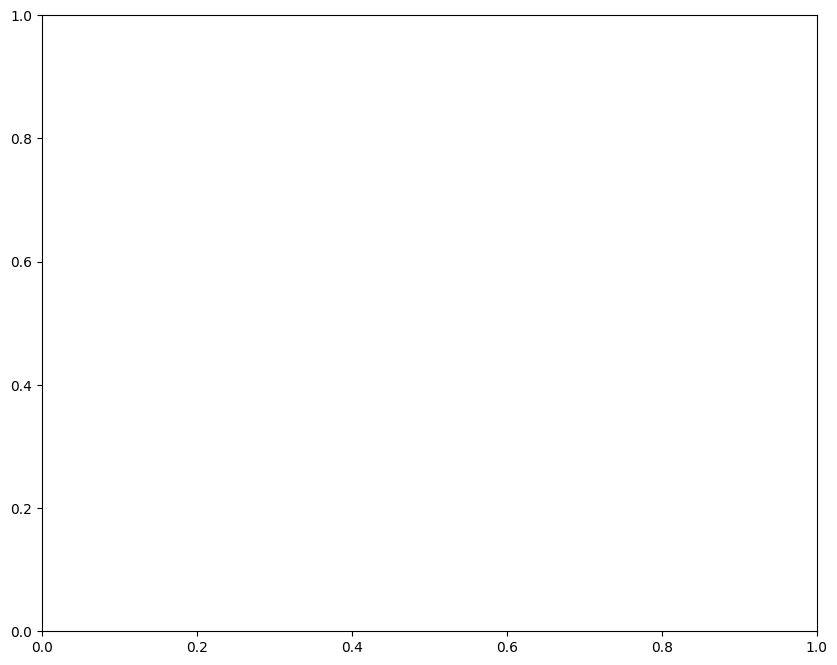

In [349]:
plt.figure(figsize=(10,8))
plt.scatter(X_svc['X_1'], X_svc['X_2'], c= svc_propabilities)

In [337]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_svc[:, 0], X_svc[:, 1], c=svc_propabilities, cmap='Blues', edgecolors='k', s=80)
plt.colorbar(scatter);

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x800 with 0 Axes>

In [ ]:
# No doy con el problema para visualizar el scatter :/